In [1]:
import os
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_recall_fscore_support

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import statistics as st
import seaborn as sns

from sklearn.inspection import permutation_importance

import shap

#Import svm model
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  ##Support Vector Machine algorithms are not scale invariant, 

#from SSD import *
##so it is highly recommended to scale your data
    
from sklearn.tree import export_graphviz    

# Convert to png using system command (requires Graphviz)
from subprocess import call

# Display in jupyter notebook
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')

In [2]:
paths = r'E:\Prasad\IITM\AHRAE-D-RP-1312-EXCEL DATA\Experiment\Fault test\2007summer_added_data'

filess = sorted(glob.glob(paths + '/*.xls'))

fs = [0,2,5,7,12,15,18,19,20]
dfs = pd.DataFrame()

for f in fs:
    datas = pd.read_excel(filess[f], 'A')
    dfs = pd.concat([dfs,datas])
    
dataframe_collections = {}   
for i in range(len(fs)):
    dataframe_collections[i] = dfs.iloc[381+1440*i:1081+1440*i,:]
    
##Missing data in 22/08/2007 
for i in range(len(fs)):
    if dataframe_collections[i].isnull().sum().sum() != 0:   #to check total no of NaN values
        dataframe_collections[i] = dataframe_collections[i].interpolate(method ='linear', limit_direction ='forward')    

b1 = [0,1,2,3,4,5,6,7,8]
train_data1 = dataframe_collections[0].iloc[460:700]
for i in range(len(fs)):
    #dataframe_collections[i] = SSD(train_data1,dataframe_collections[i])
    dataframe_collections[i].loc[:,'y']= b1[i] 
    
      
Datas = pd.DataFrame()
for i in range(len(fs)):
    Datas = pd.concat([Datas, dataframe_collections[i]] )        

#Datas= SSD(train_data1,Datas)    
Datas = Datas.reset_index()
Datas = Datas.drop(['index','DATE','TIME'], axis=1)  

In [3]:
dataframe_collections[0]

,DATE,TIME,SYS-CTL,RF-CTRL,ECONCTRL,ACCH-SEL,HWC-VLV,CHWC-VLV,EA-DMPR,RA-DMPR,...,E_hcoil,E_ccoil,E_SF,E_RF,E_ZONE_I,E_ZONE_W,E_ZONE_S,E_ZONE_E,OA-TEMP.1,y
381,8192007,621,1,1,1,1,100.0,45.368,40.0,40.0,...,0.0,15.952,0.902,0.273,-0.012,0.000,0.001,0.0,75.600,0
382,8192007,622,1,1,1,1,100.0,43.524,40.0,40.0,...,0.0,15.857,0.887,0.269,-0.011,0.000,0.001,0.0,75.639,0
383,8192007,623,1,1,1,1,100.0,40.313,40.0,40.0,...,0.0,15.695,0.889,0.261,-0.012,0.001,0.001,0.0,75.639,0
384,8192007,624,1,1,1,1,100.0,37.698,40.0,40.0,...,0.0,14.828,0.855,0.257,-0.012,0.000,0.001,0.0,75.664,0
385,8192007,625,1,1,1,1,100.0,34.503,40.0,40.0,...,0.0,13.648,0.727,0.246,-0.011,0.000,0.000,0.0,75.664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,8192007,1756,1,1,1,1,100.0,57.310,40.0,40.0,...,0.0,20.351,1.625,0.384,-0.003,0.000,-0.001,0.0,84.926,0
1077,8192007,1757,1,1,1,1,100.0,57.291,40.0,40.0,...,0.0,20.443,1.637,0.388,-0.004,0.000,-0.001,0.0,84.978,0
1078,8192007,1758,1,1,1,1,100.0,56.407,40.0,40.0,...,0.0,20.353,1.637,0.387,-0.003,0.000,-0.001,0.0,84.926,0
1079,8192007,1759,1,1,1,1,100.0,56.408,40.0,40.0,...,0.0,20.313,1.659,0.385,-0.004,0.000,-0.001,0.0,84.978,0


In [4]:
faults = [ 'NORMAL','EADCL','CCVCU','OADFC','CCVFO','CCVRA','OADL55','DLASF','DLBSF']

In [5]:
input_var = ['HWC-VLV', 'CHWC-VLV', 'EA-DMPR', 'RA-DMPR', 'OA-DMPR', 'SF-WAT', 'RF-WAT', 'HWP-GPM', 'CHWP-GPM', 'SAT_SPT', 
             'SA_SPSPT', 'SA-CFM', 'RA-CFM', 'OA-CFM', 'SA-TEMP', 'MA-TEMP', 'RA-TEMP', 'HWC-DAT', 'CHWC-DAT', 'SA-SP', 'SF-DP',
             'RF-DP', 'SF-SPD', 'RF-SPD', 'SA-HUMD', 'RA-HUMD', 'HWC-EWT', 'HWC-LWT', 'HWC-MWT', 'CHWC-EWT', 'CHWC-LWT', 
             'CHWC-MWT', 'HWP-DP', 'CHWC-EAH', 'CHWC-LAH', 'HWC_GPM', 'CHWC_GPM', 'E_hcoil', 'E_ccoil', 'OAD-TEMP','y']

In [6]:
for i, item in enumerate(input_var):
    print(i, '. ' + item, sep='',end='\n')

0. HWC-VLV
1. CHWC-VLV
2. EA-DMPR
3. RA-DMPR
4. OA-DMPR
5. SF-WAT
6. RF-WAT
7. HWP-GPM
8. CHWP-GPM
9. SAT_SPT
10. SA_SPSPT
11. SA-CFM
12. RA-CFM
13. OA-CFM
14. SA-TEMP
15. MA-TEMP
16. RA-TEMP
17. HWC-DAT
18. CHWC-DAT
19. SA-SP
20. SF-DP
21. RF-DP
22. SF-SPD
23. RF-SPD
24. SA-HUMD
25. RA-HUMD
26. HWC-EWT
27. HWC-LWT
28. HWC-MWT
29. CHWC-EWT
30. CHWC-LWT
31. CHWC-MWT
32. HWP-DP
33. CHWC-EAH
34. CHWC-LAH
35. HWC_GPM
36. CHWC_GPM
37. E_hcoil
38. E_ccoil
39. OAD-TEMP
40. y


In [7]:
input_var1 = ['E_hcoil','E_ccoil','SF-WAT','RF-WAT','SF-SPD','RF-SPD','SA-SP','SA-CFM','RA-CFM','OA-CFM','EA-DMPR',
              'RA-DMPR','OA-DMPR','RA-TEMP','RA-HUMD','SA-TEMP','CHWC-VLV','CHWC-EWT','CHWC-LWT','y']
input_var2 = ['RA-TEMP','RA-HUMD','SA-TEMP','CHWC-VLV','CHWC-EWT','CHWC-LWT','y']

In [8]:
import dice_ml
from dice_ml import Dice

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

In [9]:
df_iris = Datas[input_var]

outcome_name = "y"
continuous_features_iris = df_iris.drop(outcome_name, axis=1).columns.tolist()
target = df_iris[outcome_name]

In [10]:
# Split data into train and test
datasetX = df_iris.drop(outcome_name, axis=1)
x_train, x_test, y_train, y_test = train_test_split(datasetX,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=target)

categorical_features = x_train.columns.difference(continuous_features_iris)

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_features_iris),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_iris = Pipeline(steps=[('preprocessor', transformations),
                           ('classifier', RandomForestClassifier())])
model_iris = clf_iris.fit(x_train, y_train)

In [11]:
x_test

,HWC-VLV,CHWC-VLV,EA-DMPR,RA-DMPR,OA-DMPR,SF-WAT,RF-WAT,HWP-GPM,CHWP-GPM,SAT_SPT,...,CHWC-LWT,CHWC-MWT,HWP-DP,CHWC-EAH,CHWC-LAH,HWC_GPM,CHWC_GPM,E_hcoil,E_ccoil,OAD-TEMP
5137,100.0,40.598,40.0,40.0,40.0,1166.618,297.511,0.012,11.732,55,...,54.033,43.353,-10.820,53.063,97.438,-0.001,5.209,0.0,13.900,71.392
928,100.0,52.659,0.0,40.0,40.0,1522.694,334.993,0.022,12.180,55,...,51.108,48.087,-10.820,52.469,97.625,0.003,9.512,0.0,18.212,78.588
147,100.0,35.949,40.0,40.0,40.0,808.199,244.802,0.022,11.494,55,...,55.601,40.439,-10.820,52.375,97.688,0.002,3.835,0.0,12.130,77.622
2652,100.0,50.600,40.0,40.0,0.0,2013.470,494.290,0.012,11.762,55,...,52.989,46.921,-10.820,45.094,94.563,0.004,7.271,0.0,16.042,77.622
1192,100.0,63.467,0.0,40.0,40.0,1587.116,357.247,0.022,11.822,55,...,51.108,49.616,-10.820,50.750,97.500,-0.071,10.515,0.0,19.702,88.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,100.0,27.995,40.0,40.0,40.0,946.413,265.886,0.022,11.777,55,...,54.660,37.162,-10.820,54.031,98.313,0.030,3.570,0.0,12.474,68.169
2617,100.0,37.370,40.0,40.0,0.0,1863.543,467.350,0.022,11.762,55,...,54.033,44.372,-10.820,45.313,94.938,0.008,5.731,0.0,14.999,77.514
4748,100.0,51.468,40.0,40.0,55.0,1314.202,311.567,0.012,11.792,55,...,52.049,45.683,-10.820,53.906,98.250,-0.007,7.542,0.0,18.509,80.092
4813,100.0,52.303,40.0,40.0,55.0,1365.740,320.937,0.012,11.852,55,...,52.049,45.902,-10.828,53.438,98.250,-0.009,7.727,0.0,18.964,80.952


In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

#Create a Gaussian Classifier
model1=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
#Train the model using the training sets y_pred=clf.predict(X_test)
model1.fit(x_train,y_train)
   
# Making a prediction on the test set
y_pred = model1.predict(x_test)
y_test = le.fit_transform(y_test)   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")


Test Set Accuracy : 99.84126984126985 %


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       140
           2       1.00      1.00      1.00       140
           3       1.00      1.00      1.00       140
           4       0.99      0.99      0.99       140
           5       0.99      0.99      0.99       140
           6       1.00      1.00      1.00       140
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00       140

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260



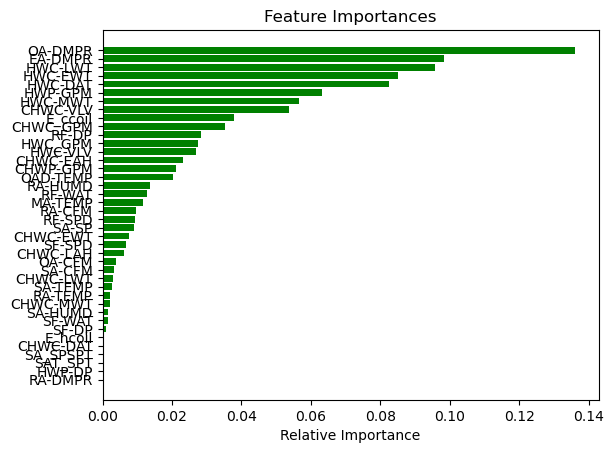

In [13]:
importances = model1.feature_importances_
from matplotlib.pyplot import figure
indices = np.argsort(importances)
features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

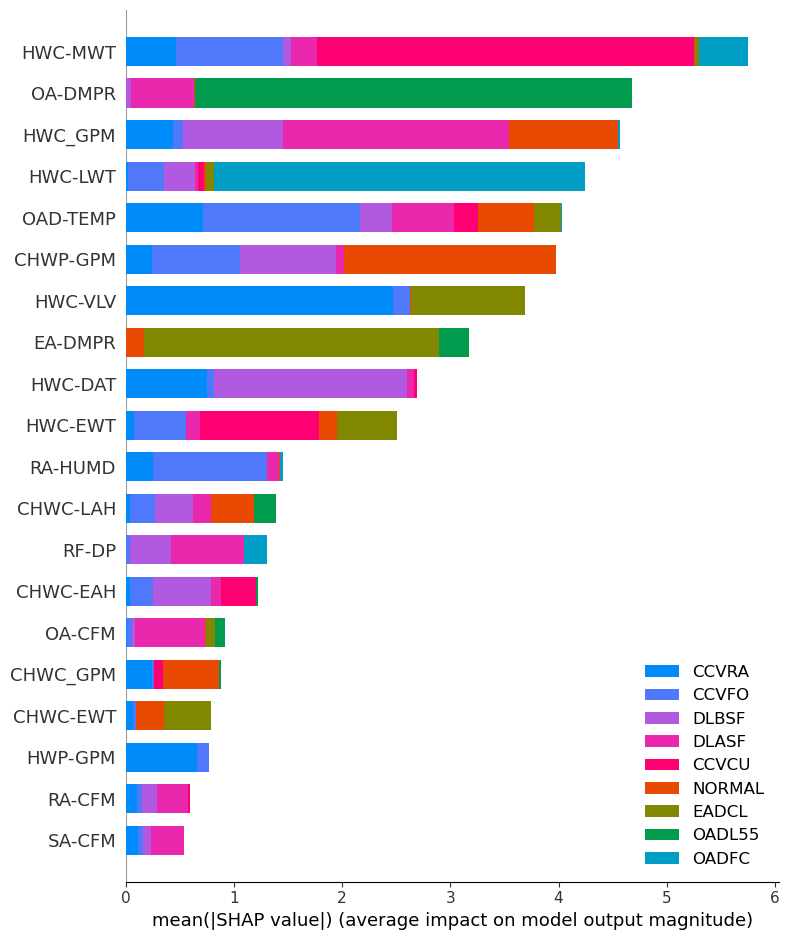

In [14]:
import shap
explainer1 = shap.TreeExplainer(model1)
shap_values1 = explainer1.shap_values(x_test)
shap.summary_plot(shap_values1, x_test,class_names= faults)

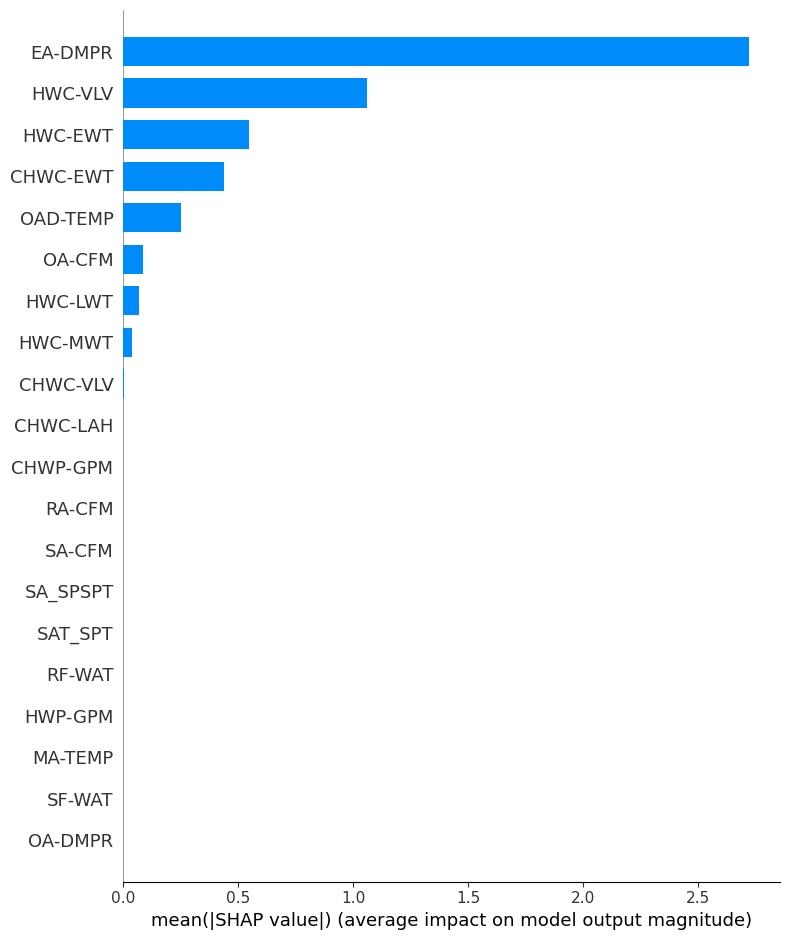

In [15]:
shap.summary_plot(shap_values1[1], x_test, plot_type="bar")

In [16]:
dc1 = {}
test={}
for i in range(9):
    dc1[i] = pd.DataFrame(np.mean(abs(shap_values1[i]),axis=0))
    test[i] = dc1[i].sort_values(0,ascending=False)


In [17]:
pd.Series.mean(test[2])

0    0.133828
dtype: float32

In [18]:
rf_explainer = shap.TreeExplainer(model1)
print(np.sum(rf_explainer.expected_value))
print(rf_explainer.expected_value)
mean_pred_rf = np.mean(model1.predict(x_test))
mean_pred_rf

3.0354940193324182
[-0.15499716  0.12303259  0.01297754  0.07884746  1.21975288  1.18521059
  0.05950548  0.14531687  0.36584778]


4.0

In [19]:
x_test.iloc[39]

HWC-VLV      100.000
CHWC-VLV      48.918
EA-DMPR       40.000
RA-DMPR       40.000
OA-DMPR       55.000
SF-WAT      1079.942
RF-WAT       264.715
HWP-GPM        0.022
CHWP-GPM      11.777
SAT_SPT       55.000
SA_SPSPT       1.400
SA-CFM      1868.205
RA-CFM      1590.207
OA-CFM       488.643
SA-TEMP       55.363
MA-TEMP       73.119
RA-TEMP       72.601
HWC-DAT       73.047
CHWC-DAT      52.440
SA-SP          1.391
SF-DP          2.245
RF-DP          0.377
SF-SPD        68.371
RF-SPD        54.656
SA-HUMD       91.714
RA-HUMD       50.077
HWC-EWT       92.807
HWC-LWT       83.244
HWC-MWT       94.458
CHWC-EWT      37.097
CHWC-LWT      53.302
CHWC-MWT      46.484
HWP-DP       -10.828
CHWC-EAH      57.406
CHWC-LAH      98.438
HWC_GPM       -0.004
CHWC_GPM       6.822
E_hcoil        0.000
E_ccoil       15.348
OAD-TEMP      73.970
Name: 4426, dtype: float64

Actual fault class is 6


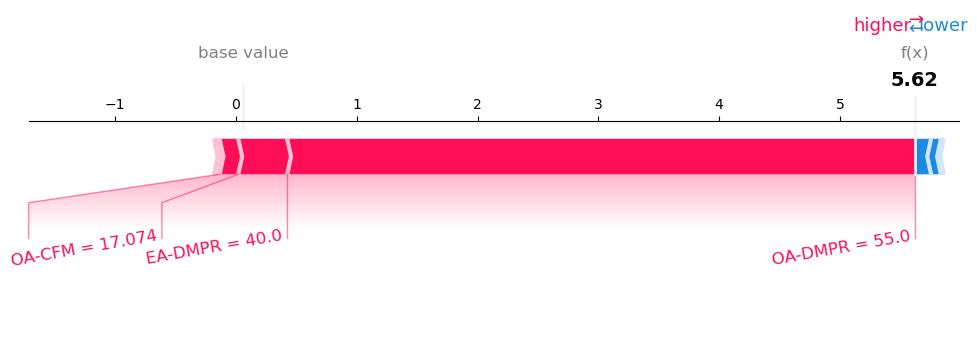

In [20]:
i=10
print('Actual fault class is',y_test[i])

#shap.initjs()
shap.force_plot(explainer1.expected_value[6], shap_values1[6][i], x_test.values[i], feature_names = x_test.columns,
                matplotlib=True,figsize=(12,3),text_rotation=10)

In [21]:
i=60
print('Actual fault class is',y_test[i])

shap.initjs()
shap.force_plot(explainer1.expected_value[4], shap_values1[4][i], x_test.values[i], feature_names = x_test.columns
                )

Actual fault class is 4


Actual fault class is 4


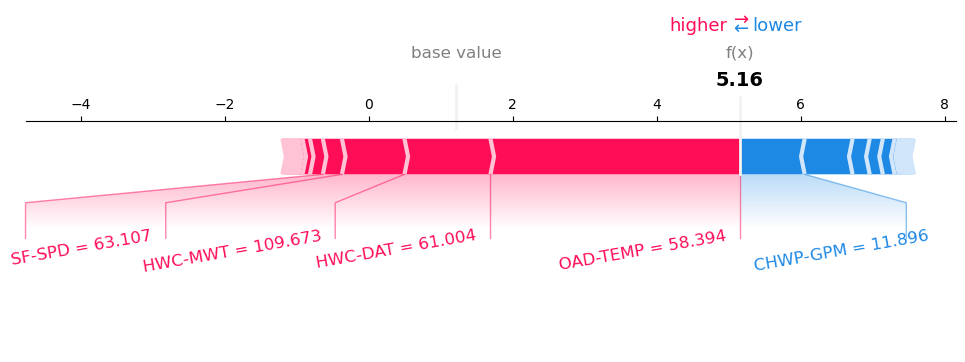

In [32]:
i=5
print('Actual fault class is',y_test[i])

#shap.initjs()
shap.force_plot(explainer1.expected_value[4], shap_values1[4][i], x_test.values[i], feature_names = x_test.columns,
                matplotlib=True,figsize=(12,3),text_rotation=10)

In [23]:
y_test

array([7, 1, 0, ..., 6, 6, 1], dtype=int64)

Actual fault class is 6


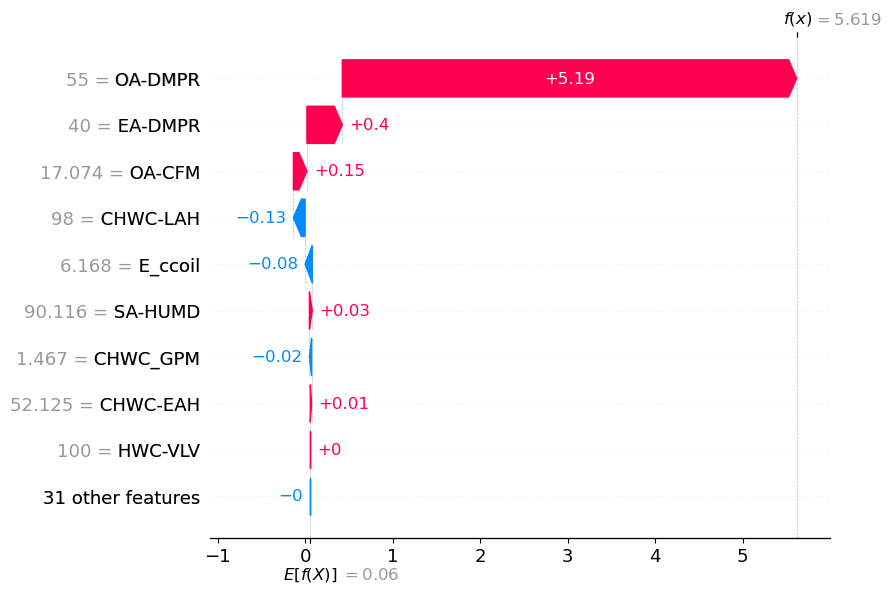

In [33]:
i=10
print('Actual fault class is',y_test[i])
shap.plots.waterfall(shap.Explanation(values=shap_values1[6][i], 
                                              base_values=explainer1.expected_value[6], data=x_test.iloc[i],  
                                         feature_names=x_test.columns.tolist()))